# Machine Learning (Amanda Ann Kirabo)

In [78]:
#Machine Learning modules
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
%matplotlib inline

In [79]:
#Loading the dataset


cd = pd.read_csv('heartDisease.csv')
cd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Logistic Regression

In [80]:
#Logistic Regression
#Predict one or more possible outcomes {Usually represented by 0 and 1}
#Column target
cd.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

## Getting the mean

In [81]:
#Get the mean
cd.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


## Scatter Plot

<function matplotlib.pyplot.show(close=None, block=None)>

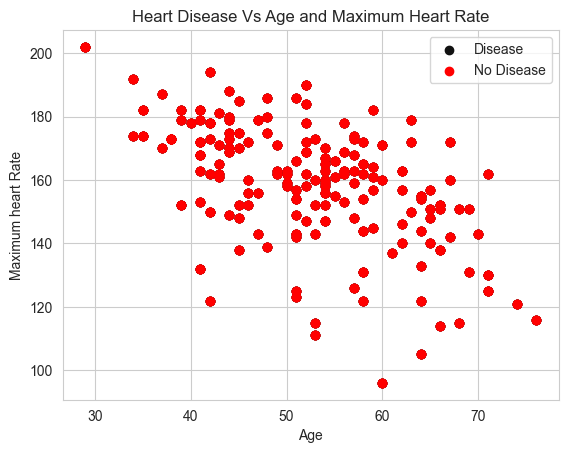

In [82]:
#Create a scatter plot for heart disease Vs Age and Maximum heart rate
plt.scatter(x=cd.age[cd.target==1], y=cd.thalach[cd.target==1], c='#111', label='Disease')
plt.scatter(x=cd.age[cd.target==1], y=cd.thalach[cd.target==1], c='#FF0000', label='No Disease')

#Add a legend
plt.legend()
#Add labels to the axes
plt.xlabel('Age')
plt.ylabel('Maximum heart Rate')

#Set the title of the plot
plt.title('Heart Disease Vs Age and Maximum Heart Rate')

#Show the plot
plt.show

In [83]:
#Create a logistic Regression
#Help to solve problems with classification
#Create independent variables and dependent variables
y = cd.target.values
x_data = cd.drop(['target'], axis = 1)

In [84]:
import warnings
warnings.filterwarnings('ignore')

#Normalize the data
x = (x_data - np.min(x_data))/(np.max(x_data)) - np.min(x_data)

### Splitting Data

In [85]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


### Transpose matrices

In [86]:
#Transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

### Getting Accuracy

In [87]:
#Get the accuracy using Logistic Regression
#Getting the Test Accuracy
accuracies = {}
lr = LogisticRegression()
lr.fit(x_train.T, y_train.T)
acc = lr.score(x_test.T, y_test.T) * 100

accuracies['LogisticRegression'] = acc

#Get Output
print('Test Accuracy {:.2f}%'.format(acc))

Test Accuracy 60.00%


In [88]:
#First import the K- nearest  neighbours (KNN) classifier
#Get accuracy score of the K-nearest Neighbours

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

#Get output display
print('{} NN Score: {:.2f}%'.format(2, knn.score(x_train.T, y_train.T)*100))

2 NN Score: 99.63%


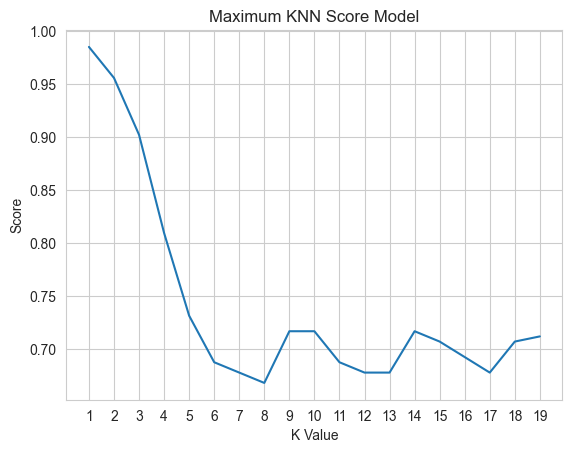

Maximum KNN Score is 98.54%


In [89]:
#Get Maximum KNN score for the model
score_list = []
for i in range(1, 20):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(x_train.T, y_train.T)
    score_list.append(knn2.score(x_test.T, y_test.T))
    
 #Show using line plot
plt.plot(range(1, 20), score_list)
plt.xticks(np.arange(1, 20, 1))
plt.xlabel('K Value')
plt.ylabel('Score')
plt.title('Maximum KNN Score Model')
plt.show()

#Get Maximum KNN score for the model in percentage
acc = max(score_list) * 100
accuracies['KNN'] = acc
print('Maximum KNN Score is {:.2f}%'.format(acc))

### Testing Accuracy

In [90]:
#Test the accuracy using the support vector machine(SVM) algorithm
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_train.T, y_train.T)*100
accuracies['SVM'] = acc
print('Test Accuracy of SVM Algorithm: {:.2f}%'.format(acc))

Test Accuracy of SVM Algorithm: 72.32%


In [91]:
#Get accuracy using Naive Bayes Algorithm
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T, y_test.T) * 100
accuracies['Naive Bayes'] = acc
print('Test Accuracy of Naive Bayes: {:.2f}%'.format(acc))

Test Accuracy of Naive Bayes: 80.00%


In [92]:
#Get accuracy using a decision tree model
atc = DecisionTreeClassifier()
atc.fit(x_train.T, y_train.T)

acc = atc.score(x_test.T, y_test.T) * 100
accuracies['Decision Tree'] = acc
print('Decision Tree Test Accuracy: {:.2f}%'.format(acc))

Decision Tree Test Accuracy: 98.54%


In [93]:
#Get accuracy of random forest Classifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T, y_test.T) * 100
accuracies['Random Forest'] = acc
print('Random Forest Algorithm Accuracy Score: {:.2f}%'.format(acc))

Random Forest Algorithm Accuracy Score: 98.54%


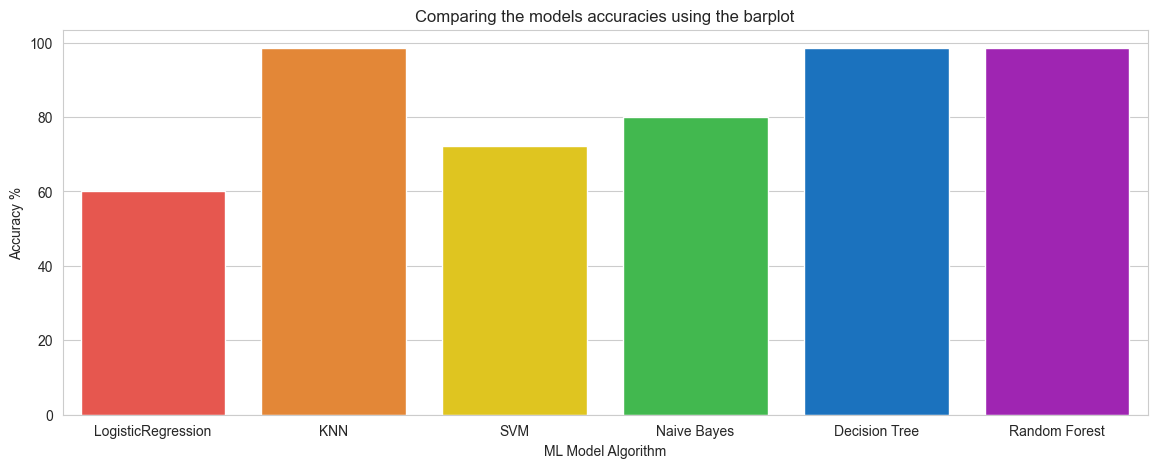

In [94]:
#Compare the models accuracy using the barplot from sns
import seaborn as sns

colors = ['#FF4136', '#FF851B', '#FFDC00', '#2ECC40', '#0074D9', '#B10DC9']
sns.set_style('whitegrid')
plt.figure(figsize=(14, 5))
plt.xticks(np.arange(0,100,10))
plt.title('Comparing the models accuracies using the barplot')
plt.ylabel('Accuracy %')
plt.xlabel('ML Model Algorithm')
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

### Confusion Matrix

In [95]:
#ML confusion matrix
#Evaluate the performance of a matrix
#Get confusion matrices to look at the inbalance dataset
#Predicted values
y_head_lr = lr.predict(x_test.T)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train.T, y_train.T)
y_head_knn = knn3.predict(x_test.T)
y_head_svm = svm.predict(x_test.T)
y_head_nb = nb.predict(x_test.T)
y_head_atc = atc.predict(x_test.T)
y_head_rf = rf.predict(x_test.T)

In [96]:
cm_lr = confusion_matrix(y_test, y_head_lr)
cm_knn = confusion_matrix(y_test, y_head_knn)
cm_svm = confusion_matrix(y_test, y_head_svm)
cm_nb = confusion_matrix(y_test, y_head_nb)
cm_atc = confusion_matrix(y_test, y_head_atc)
cm_rf = confusion_matrix(y_test, y_head_rf)

## HeatMaps

#### Heat map for logistic Regression Confusion Matrix

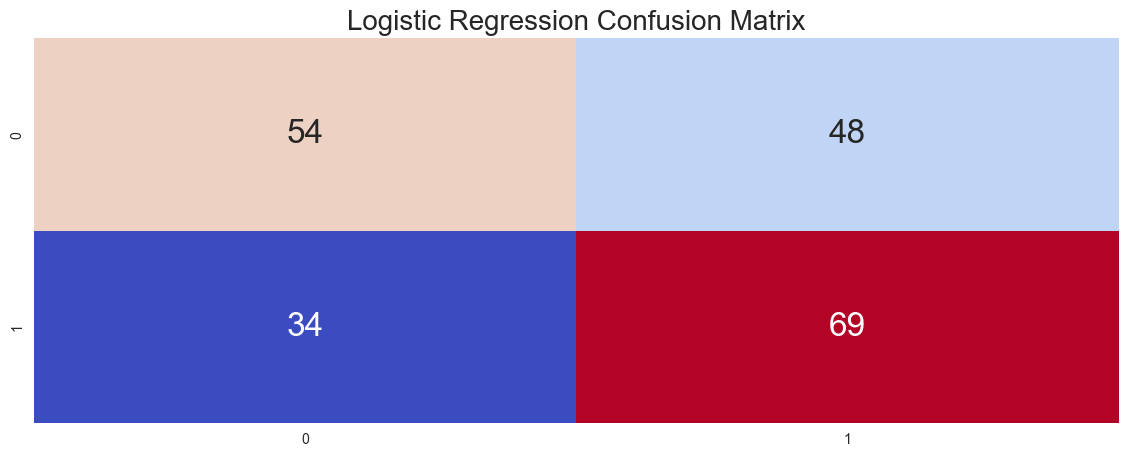

In [103]:
#Heatmap for "Logistic Regression Confusion Matrix"

plt.figure(figsize=(14, 5))
plt.title("Logistic Regression Confusion Matrix", fontsize = 20)
sns.heatmap(cm_lr,annot=True,cmap="coolwarm",fmt="d",cbar=False,annot_kws={"size":24})
plt.show()

#### Heat map for K Nearest Confusion Matrix

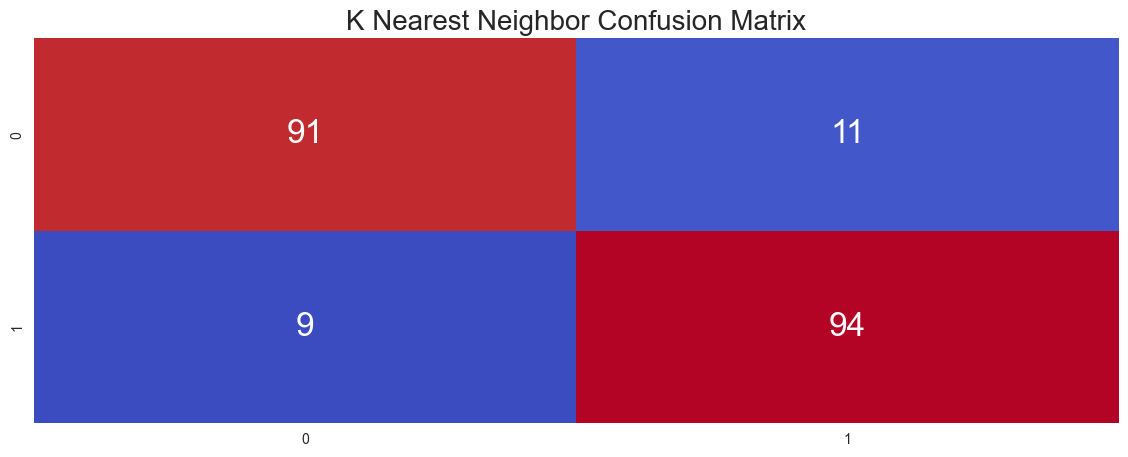

In [104]:
#Heatmap for "K Nearest Neighbor Confusion Matrix"
plt.figure(figsize=(14, 5))
plt.title("K Nearest Neighbor Confusion Matrix", fontsize = 20)
sns.heatmap(cm_knn,annot=True,cmap="coolwarm",fmt="d",cbar=False,annot_kws={"size":24})
plt.show()

#### Heat map for Support Vector Machine Confusion Matrix

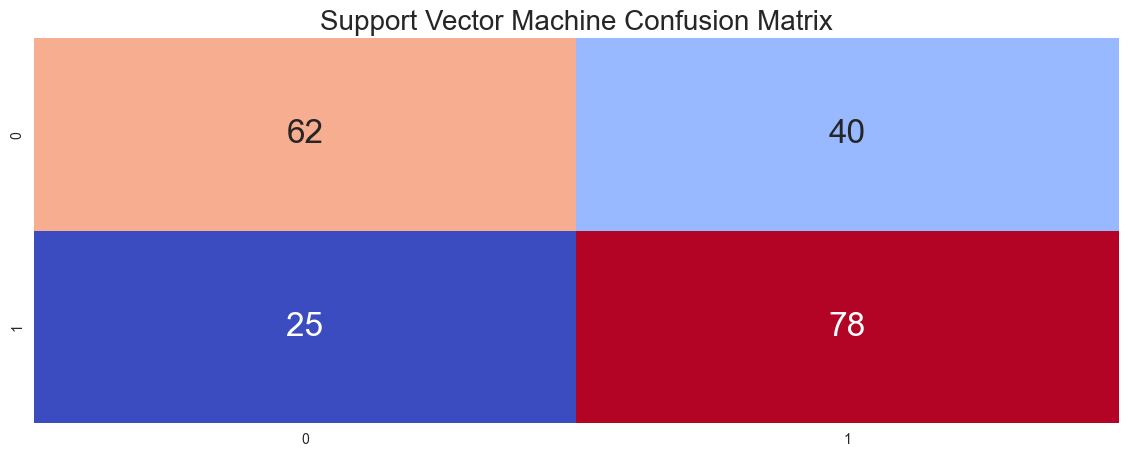

In [105]:
#Heatmap for "Support Vector Machine Confusion Matrix"
plt.figure(figsize=(14, 5))
plt.title("Support Vector Machine Confusion Matrix", fontsize = 20)
sns.heatmap(cm_svm,annot=True,cmap="coolwarm",fmt="d",cbar=False,annot_kws={"size":24})
plt.show()


#### Heat map for Naive Bayes Confusion Matrix

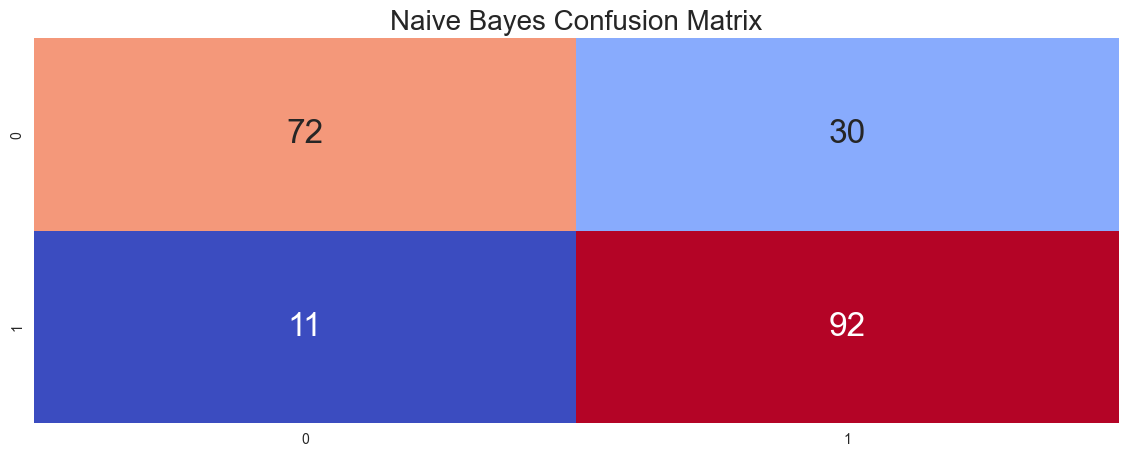

In [106]:
#Heatmap for "Naive Bayes Confusion Matrix"
plt.figure(figsize=(14, 5))
plt.title("Naive Bayes Confusion Matrix", fontsize = 20)
sns.heatmap(cm_nb,annot=True,cmap="coolwarm",fmt="d",cbar=False,annot_kws={"size":24})
plt.show()

#### Heat map for Decision Tree Classifier Confusion Matrix

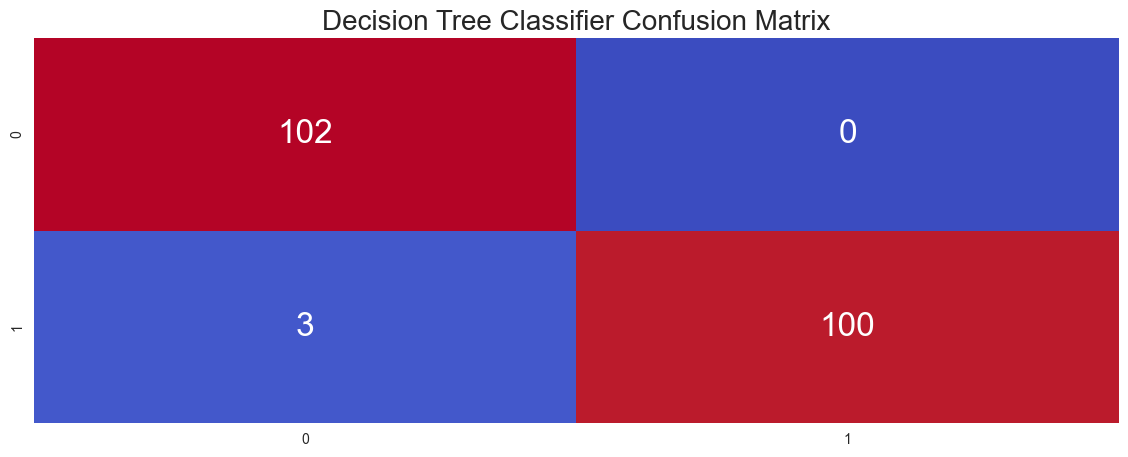

In [107]:
#Heatmap for "Decision Tree Classifier Confusion Matrix"
plt.figure(figsize=(14, 5))
plt.title("Decision Tree Classifier Confusion Matrix", fontsize = 20)
sns.heatmap(cm_atc,annot=True,cmap="coolwarm",fmt="d",cbar=False,annot_kws={"size":24})
plt.show()

#### Heat map for Random Forest Classifier Confusion Matrix

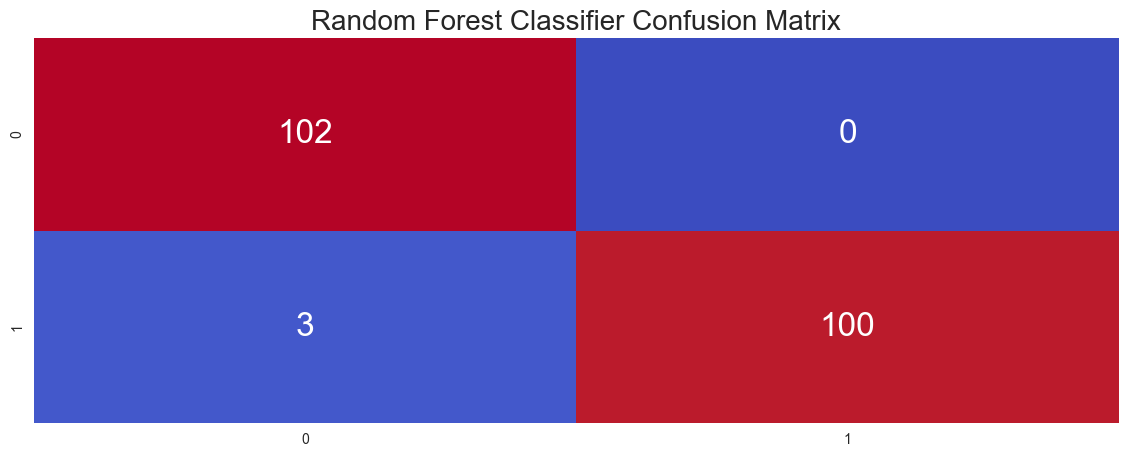

In [108]:
#Heatmap for "Random Forest Classifier Confusion Matrix"
plt.figure(figsize=(14, 5))
plt.title("Random Forest Classifier Confusion Matrix", fontsize = 20)
sns.heatmap(cm_rf,annot=True,cmap="coolwarm",fmt="d",cbar=False,annot_kws={"size":24})
plt.show()